Manifold learning: 고차원의 데이터 포인트 사이의 거리를 가장 잘 표현하는 2차원을 찾자!

t-SNE: t-Distributed Stochastic Neighbor Embedding

일부의 manifold learning 기법 (t-SNE 포함): 새로운 데이터를 예측하기 힘듦 (시각화 용도)

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
# mnist dataset과 비슷함
digits = load_digits()

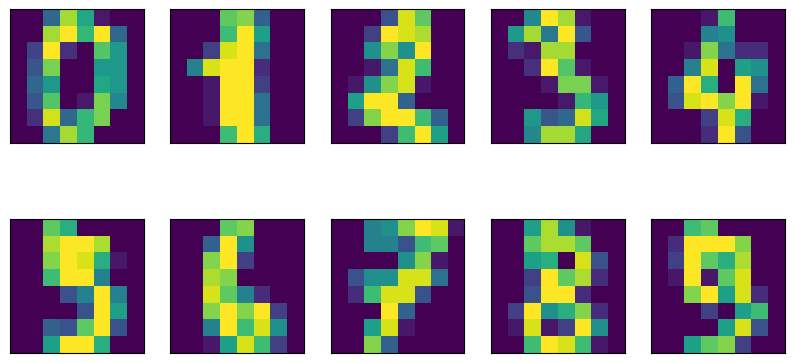

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={"xticks":(), "yticks":()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [6]:
from sklearn.decomposition import PCA

In [7]:
x_pca = PCA(n_components=2).fit_transform(digits.data)

In [8]:
import numpy as np
from random import random

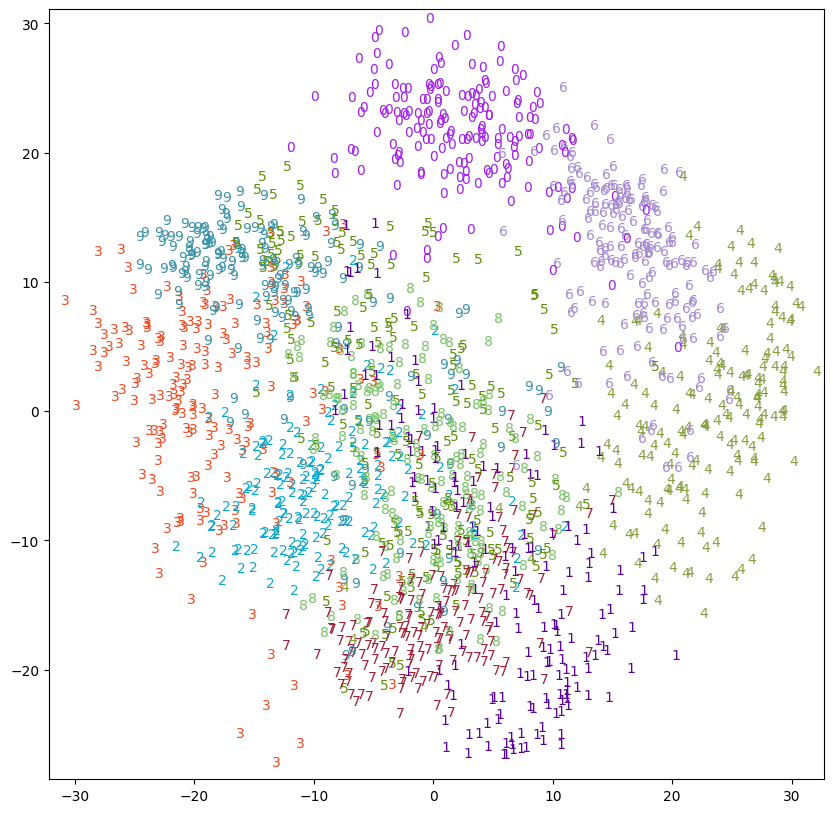

In [13]:
plt.figure(figsize=(10, 10))

# 제일 큰 것부터 제일 작은 것까지 들어갈 수 있도록 범위를 만들어줌
plt.xlim(x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1)
plt.ylim(x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1)

# RGB여서 10개 숫자마다 다른 색으로 하려고
colors = [(random(), random(), random()) for _ in range(10)]

for i in range(len(digits.data)):
    plt.text(x_pca[i, 0], x_pca[i, 1], str(digits.target[i]), color=colors[digits.target[i]])


# 고차원의 데이터를 2차원으로 나타냄
# 64차원의 데이터를 2차원으로 바꿔서 2차원으로 찍어보니까 아래와 같이 보여짐

In [14]:
from sklearn.manifold import TSNE

In [15]:
x_tsne = TSNE(random_state=1).fit_transform(digits.data)

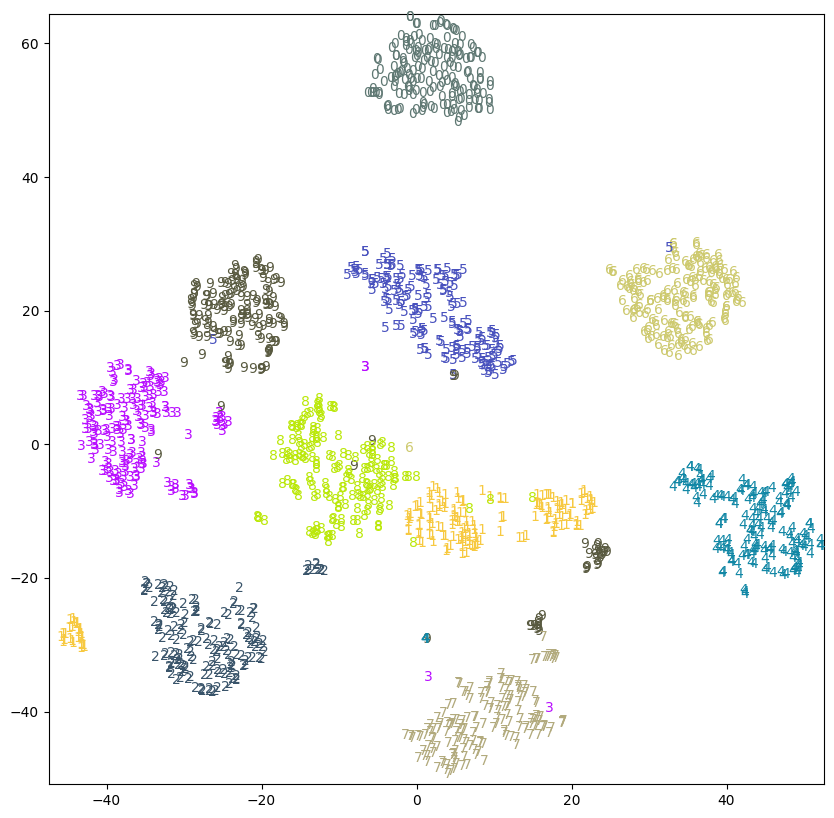

In [19]:
# 고차원으로 되어있는 데이터들을 가장 잘 분류할 수 있는 면을 찾자
# 1이랑 9를 제외하고 나머지 숫자들을 잘 뭉쳐져 있음


plt.figure(figsize=(10, 10))
plt.xlim(x_tsne[:, 0].min()-1, x_tsne[:,0].max()+1)
plt.ylim(x_tsne[:, 1].min()-1, x_tsne[:,1].max()+1)

colors = [(random(), random(), random()) for _ in range(10)]

for i in range(len(digits.data)):
    plt.text(x_tsne[i, 0], x_tsne[i, 1], str(digits.target[i]), color=colors[digits.target[i]])


In [20]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [21]:
digits.target

# 0부터 9 사이를 분류하고 있는 것

array([0, 1, 2, ..., 8, 9, 8])